# Cricket Batting Analysis

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Batsman Data

In [3]:
df=pd.read_csv('batsman.csv')

### View first 5 rows and last 5 rows

In [4]:
df.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [5]:
df.tail()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
203,140,107,3,Stumped,2,West Indies,2018
204,157,129,3,NO,1,West Indies,2018
205,107,119,3,Bowled,2,West Indies,2018
206,16,17,3,Caught,1,West Indies,2018
207,33,29,3,NO,2,West Indies,2018


### Descriptive Statistics

In [6]:
# Five point summary
df.describe(include='all')

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
count,208.000000,208.000000,208.000000,208,208.000000,208,208.000000
unique,NaN,NaN,NaN,7,NaN,12,NaN
top,NaN,NaN,NaN,Caught,NaN,Sri Lanka,NaN
freq,NaN,NaN,NaN,121,NaN,45,NaN
mean,49.192308,52.961538,3.264423,NaN,1.567308,NaN,2013.240385
std,43.797641,39.850548,0.781602,NaN,0.496644,NaN,2.750477
min,0.000000,0.000000,1.000000,NaN,1.000000,NaN,2008.000000
25%,10.750000,18.000000,3.000000,NaN,1.000000,NaN,2011.000000
50%,35.000000,46.500000,3.000000,NaN,2.000000,NaN,2013.000000
75%,81.250000,83.250000,3.000000,NaN,2.000000,NaN,2015.000000


### Q1 What is the percentage for Kohli being Not Out.

In [16]:
df['Dismissal'].value_counts().index

Index(['Caught', 'NO', 'Bowled', 'LBW', 'Run out', 'Stumped', 'Hit wicket'], dtype='object')

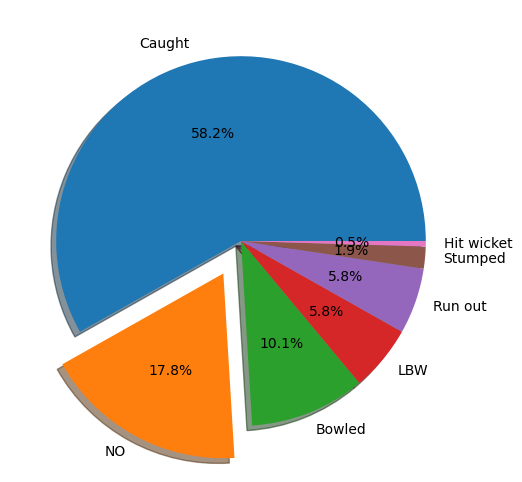

In [20]:
# pie chart
plt.figure(figsize=(6,6))
plt.pie(df['Dismissal'].value_counts(),autopct='%.1f%%',labels=df['Dismissal'].value_counts().index,
        explode=[0,0.2,0,0,0,0,0],shadow=True);

### Q2 Find the number of times when kohli scored less than or equal to 7 runs?

In [27]:
df[df['RunsScored']<=7].count()

RunsScored         40
BallsFaced         40
BattingPosition    40
Dismissal          40
Inning             40
Opposition         40
Year               40
dtype: int64

In [28]:
183/7

26.142857142857142

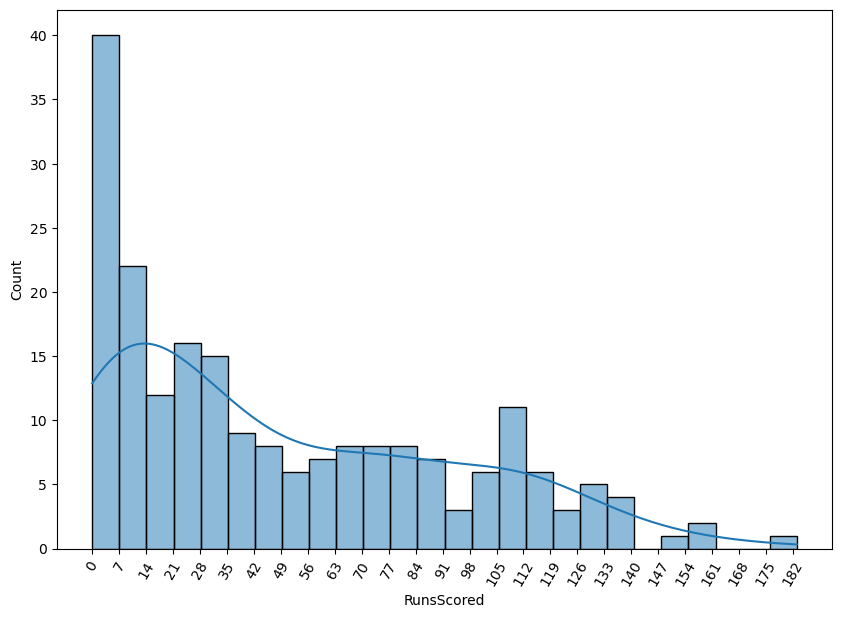

In [33]:
plt.figure(figsize=(10,7))
sns.histplot(x='RunsScored',data=df,bins=26,kde=True)
plt.xticks(np.arange(0,183,7),rotation=60);

### Q3 Show the 5 point summary of runs scored by Kohli?

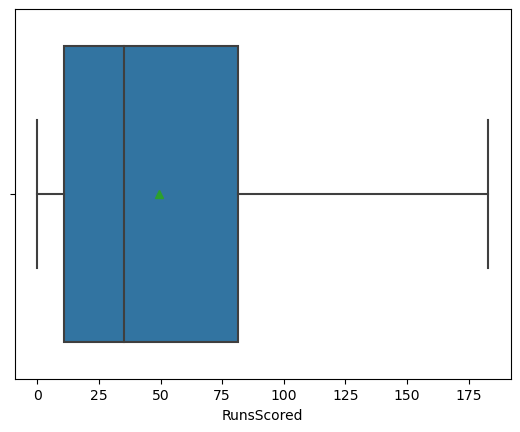

In [36]:
# boxplot
sns.boxplot(x='RunsScored',data=df,showmeans=True);

### Q4 What is the best way that the opposition team bowlers can get Kohli out?

In [50]:
df['Dismissal'].value_counts().index

Index(['Caught', 'NO', 'Bowled', 'LBW', 'Run out', 'Stumped', 'Hit wicket'], dtype='object')

In [ ]:
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1))

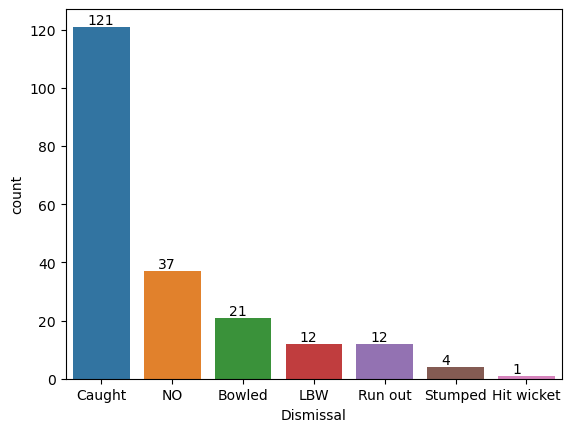

In [60]:
ax=sns.countplot(x='Dismissal',data=df,order=df['Dismissal'].value_counts().index)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+1));

### Q5. Against which opposition team Kohli has played the most in his career?

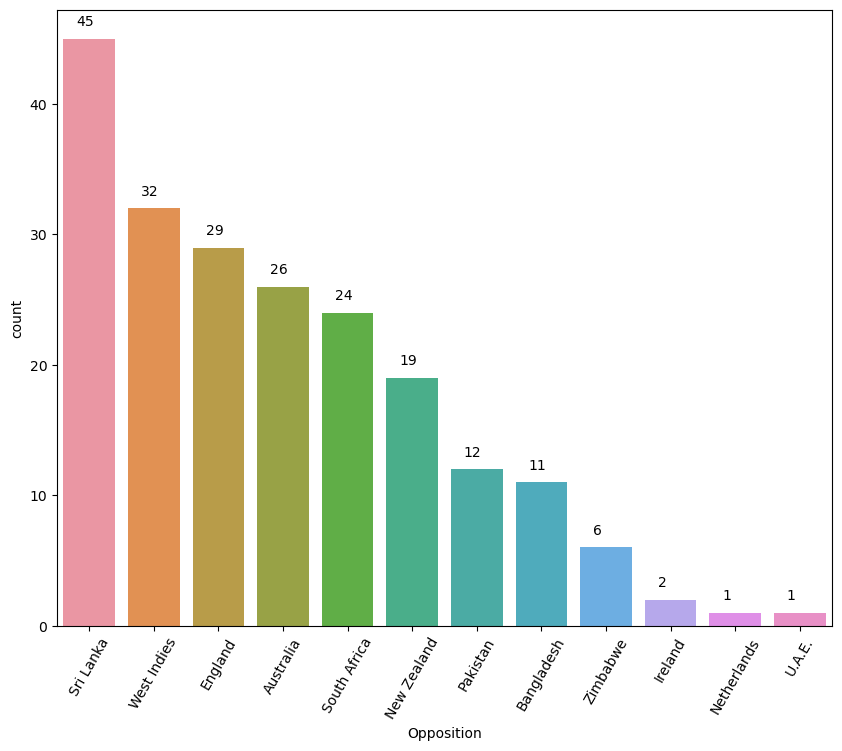

In [63]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Opposition',data=df,order=df['Opposition'].value_counts().index)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+1))
plt.xticks(rotation=60);

### Q6. Find out some interesting dismissal patterns in Kohli's career againsts the oppositions.

In [81]:
# x= Dismissal, y= opposition
# create a pivot table
ct=pd.crosstab(df['Opposition'],df['Dismissal'])
ct

Dismissal,Bowled,Caught,Hit wicket,LBW,NO,Run out,Stumped
Opposition,,,,,,,
Australia,2,18,0,1,3,2,0
Bangladesh,3,3,0,1,3,0,1
England,4,17,1,2,4,0,1
Ireland,0,0,0,0,1,1,0
Netherlands,1,0,0,0,0,0,0
New Zealand,0,16,0,0,3,0,0
Pakistan,2,8,0,0,2,0,0
South Africa,0,16,0,0,5,3,0
Sri Lanka,4,24,0,6,8,3,0


<AxesSubplot:xlabel='Opposition'>

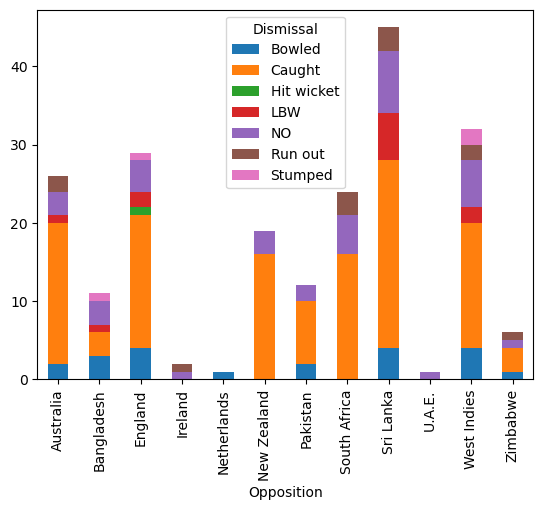

In [82]:
ct.plot(kind='bar',stacked=True)

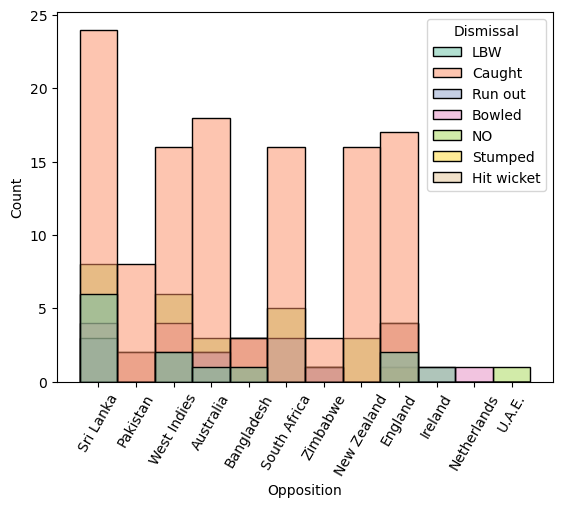

In [80]:
sns.histplot(x='Opposition',hue='Dismissal',data=df,palette='Set2')
plt.xticks(rotation=60);

### Q7. Which opposition has Kohli scored most runs against? Find the mean and median score against different oppositions and use a boxplot to represent it?

In [84]:
# Opposition, runsscored

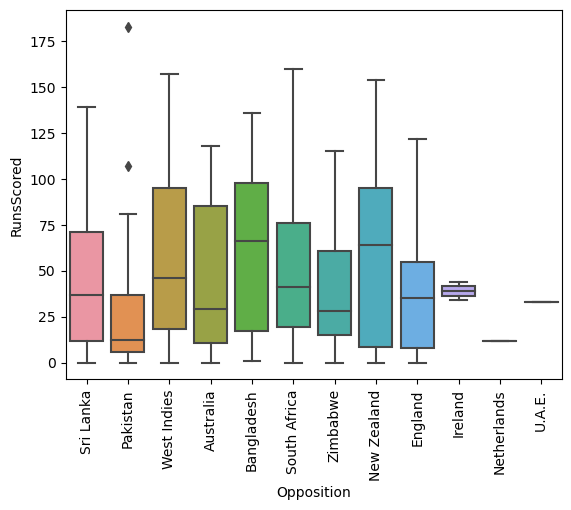

In [87]:
sns.boxplot(x='Opposition',y='RunsScored',data=df)
plt.xticks(rotation=90);

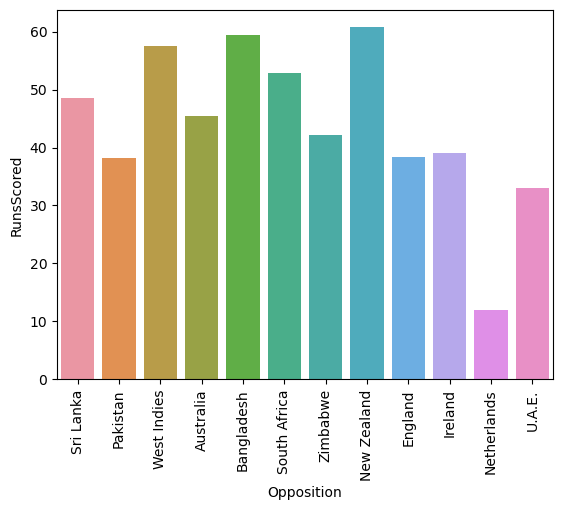

In [89]:
sns.barplot(x='Opposition',y='RunsScored',data=df,ci=None)
plt.xticks(rotation=90);

### Q8. Compare the runs scored by Kohli in 1st innings vs the 2nd innings.

In [90]:
df.columns

Index(['RunsScored', 'BallsFaced', 'BattingPosition', 'Dismissal', 'Inning',
       'Opposition', 'Year'],
      dtype='object')

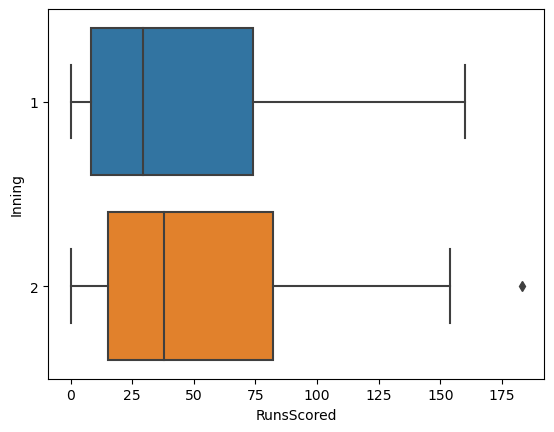

In [93]:
sns.boxplot(x='RunsScored',y='Inning',data=df,orient='h');

## Pre and Post transformation comparison ( Transformation after 2012)

### Q9. Use a Boxplot to compare the runs Scored before and after transformation

In [99]:
#df['Year']>2012

In [95]:
df['post_transformation']=df['Year']>2012

In [98]:
#df.tail()

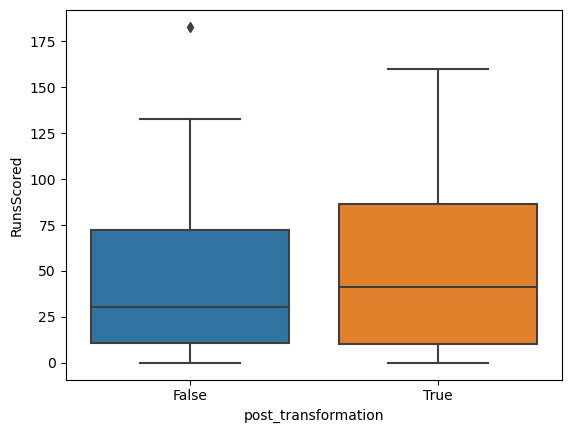

In [100]:
sns.boxplot(x='post_transformation',y='RunsScored',data=df);

### Q10. Use a Boxplot to compare the Balls Faced before and after transformation

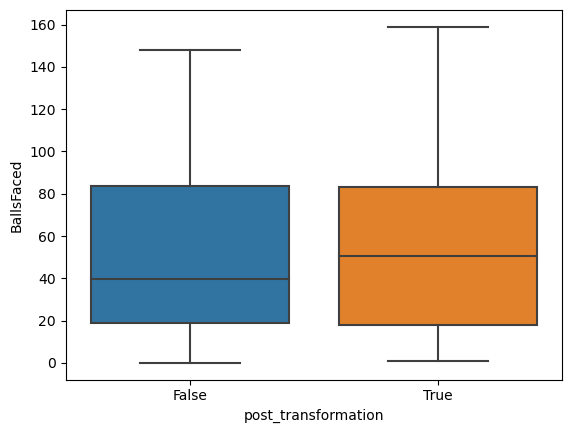

In [101]:
sns.boxplot(x='post_transformation',y='BallsFaced',data=df);

### Q11. compare the dismissal patterns before and after transformation.

<AxesSubplot:xlabel='Dismissal', ylabel='count'>

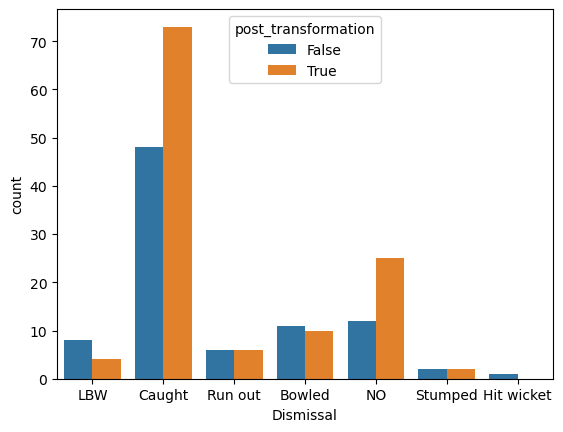

In [103]:
sns.countplot(x='Dismissal',hue='post_transformation',data=df)

### Q12. Visualize Yearly trend in run scored by Virat Kohli

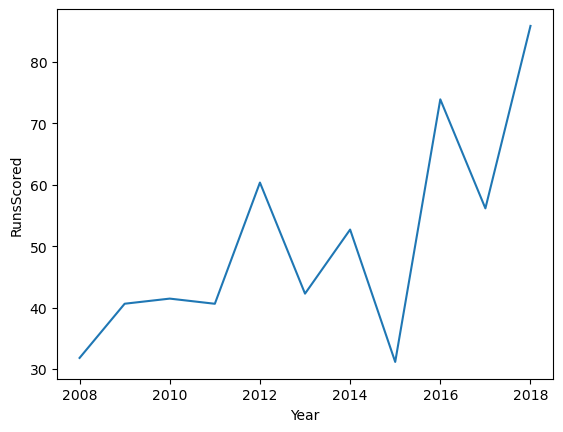

In [105]:
sns.lineplot(x='Year',y='RunsScored',data=df,ci=None);

### Q13. Relationship between RunsScored & BallsFaced over different batting positions?

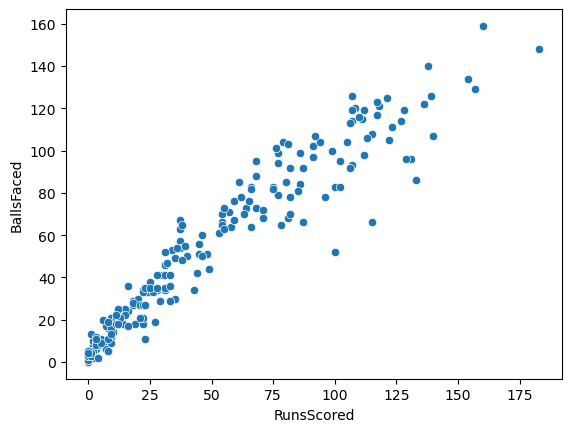

In [106]:
sns.scatterplot(x='RunsScored',y='BallsFaced',data=df);

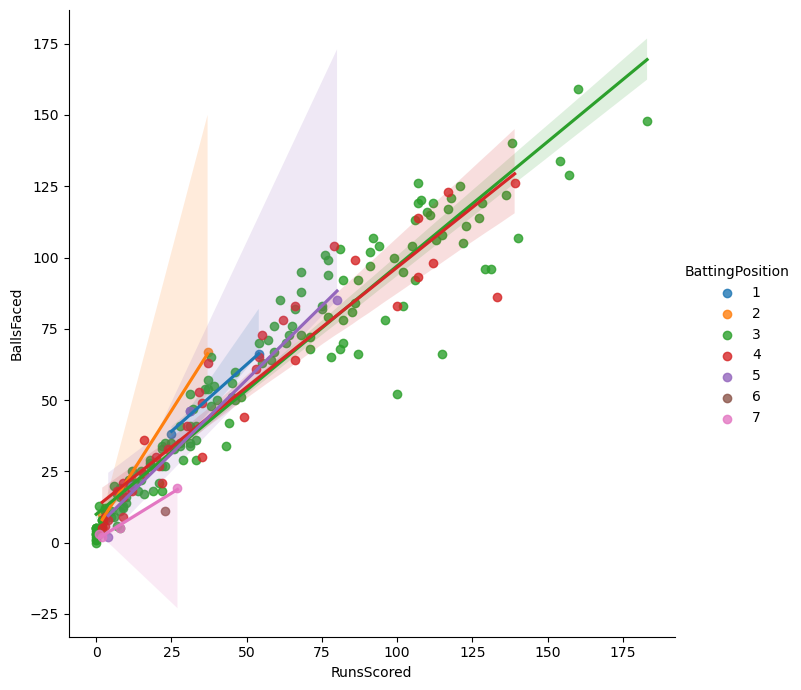

In [108]:
sns.lmplot(x='RunsScored',y='BallsFaced',data=df,hue='BattingPosition',height=7);

### Q14. How the batting position has changed with different oppositions yearly?

<AxesSubplot:xlabel='Year', ylabel='BattingPosition'>

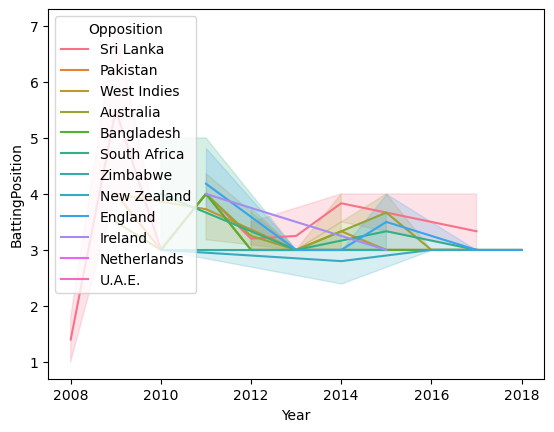

In [109]:
sns.lineplot(x='Year',y='BattingPosition',data=df,hue='Opposition')

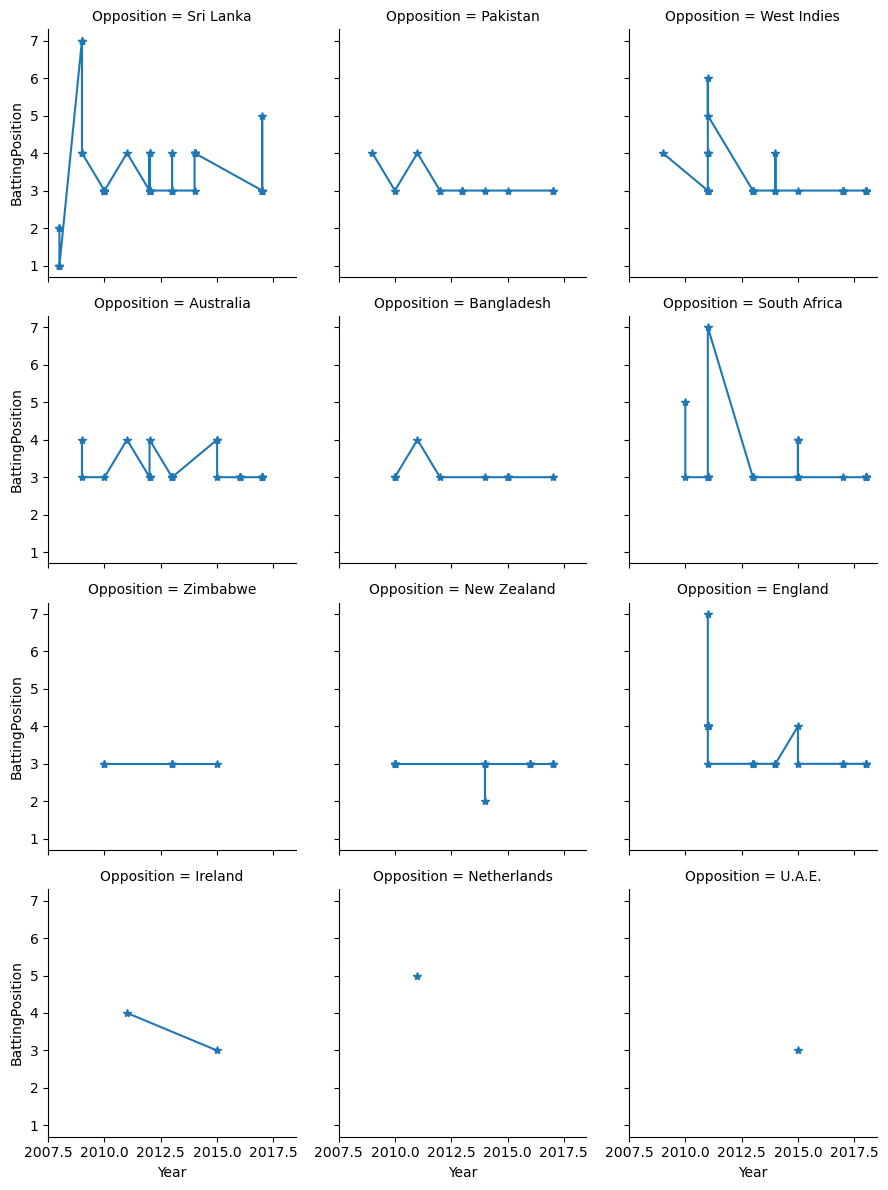

In [113]:
g=sns.FacetGrid(df,col='Opposition',col_wrap=3)
g.map(plt.plot,'Year','BattingPosition',marker='*')